In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
import re
import seaborn as sns
import scipy.stats as ss
import random

In [2]:
pit_stops=pd.read_csv(r'./pit_stops.csv')
races=pd.read_csv(r'./races.csv')

In [3]:
pit_stops.drop(['time', 'duration'], axis=1, inplace=True)
#quitar hora de parada y tiempo en segundos

In [4]:
# cambiar tipo de campo milisegundpos a entero
pit_stops["milliseconds"].astype(int)

0       26898
1       25021
2       23426
3       23251
4       23842
        ...  
9891    22054
9892    22731
9893    21537
9894    22062
9895    22357
Name: milliseconds, Length: 9896, dtype: int32

In [5]:
print('Primera carrera registrada en csv pit_stops: {}'.format(pit_stops['raceId'].min()))
print('Última carrera registrada en csv pit_stops: {}'.format(pit_stops['raceId'].max()))

Primera carrera registrada en csv pit_stops: 841
Última carrera registrada en csv pit_stops: 1105


In [6]:
#index en races.csv de la primera carrera registrada en pit_stops  ==> 840
print(races[races.raceId==841].index)
print(races[races.raceId==1105].index)

Index([839], dtype='int64')
Index([1085], dtype='int64')


In [7]:
# rango de los indices de las carreras válidas  == 839 a 1085, para las carreras 841 a 1105

races[(races.raceId>=841) & (races.raceId<=1105)].index

Index([ 839,  840,  841,  842,  843,  844,  845,  846,  847,  848,
       ...
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085],
      dtype='int64', length=247)

In [8]:
# a partir del índice de races, creo un diccionario con raceId y nombre (para generar gráficos personalizados)

dictraces={}
nombre_carreras=races[['raceId','name','year']]
for i in races[(races.raceId>=841) & (races.raceId<=1105)].index:
    dictraces[nombre_carreras.loc[i,'raceId']]={'año':nombre_carreras.loc[i, 'year'], 'nombre':nombre_carreras.loc[i, 'name'] }

print(dictraces[841])
print(dictraces[1105])

{'año': 2011, 'nombre': 'Australian Grand Prix'}
{'año': 2023, 'nombre': 'Spanish Grand Prix'}


In [9]:
pit_stops["milliseconds"][pit_stops.milliseconds<15000].describe()

count       56.000000
mean     14172.517857
std        584.055726
min      12897.000000
25%      13971.750000
50%      14136.000000
75%      14575.750000
max      14998.000000
Name: milliseconds, dtype: float64

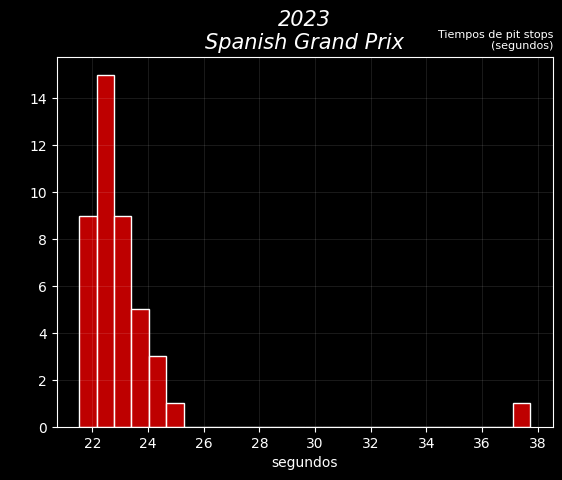

In [13]:
# ejemplos de distribución de los segundos de cada pit stop por carrera
carrera=random.randint(841,1105)

plt.xlabel('segundos')
plt.ylabel(' ')

plt.style.use('dark_background')

plt.grid(alpha=0.1)

plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center', fontsize=15)
plt.title("Tiempos de pit stops\n(segundos)", fontsize=8, loc='right')

sns.histplot(pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000, color='red');

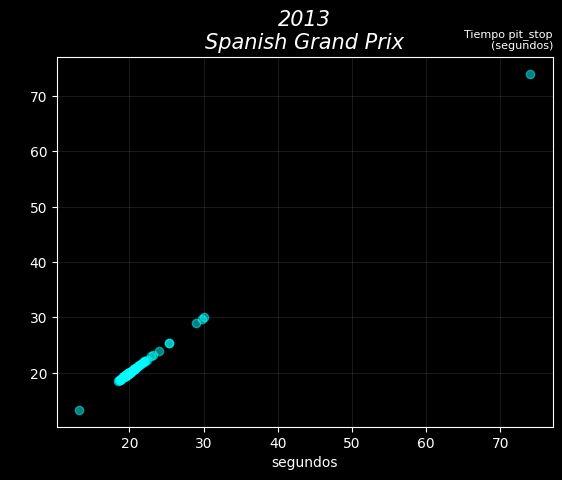

In [15]:
carrera=random.randint(841,1005)
#plt.title(f'Carrera Nº {carrera},\nTiempos de pit stops (en segundos)')
plt.grid(alpha=0.1)
plt.xlabel('segundos')
plt.ylabel(' ')
plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center', fontsize=15)
plt.title(f'Tiempo pit_stop\n(segundos)', loc='right', fontsize=8)
plt.scatter(pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000, pit_stops[pit_stops.raceId==carrera]["milliseconds"]/1000, c='aqua', alpha=0.5)

In [16]:
# diccionario con tiempos máximos y minimos de pit_stop por carrera
dict_max_min={}
for i in range(841,1006):
    dict_max_min[i]=(pit_stops[pit_stops.raceId==i]['milliseconds'].min(), pit_stops[pit_stops.raceId==i]['milliseconds'].max())

In [17]:
print(min(dict_max_min.values()))
print(max(dict_max_min.values()))

(12897, 43574)
(29736, 35112)


In [19]:
minimo=[]
maximo=[]
for j in dict_max_min.values():
    minimo.append(j[0])
    maximo.append(j[1])

In [20]:
print(f"Menor tiempo absoluto de pitstop: {min(minimo)}")
#print(f"Mayor tiempo menor de pitstop: {max(minimo)}")

#print(f"Menor tiempo mayor de pitstop: {min(maximo)}")
print(f"Mayor tiempo absoluto de pitstop: {max(maximo)}")

Menor tiempo absoluto de pitstop: 12897
Mayor tiempo absoluto de pitstop: 2011266


In [21]:
#sns.set (rc = {"figure.figsize" :( 20 , 4 )}) # ancho = 20, # alto = 4

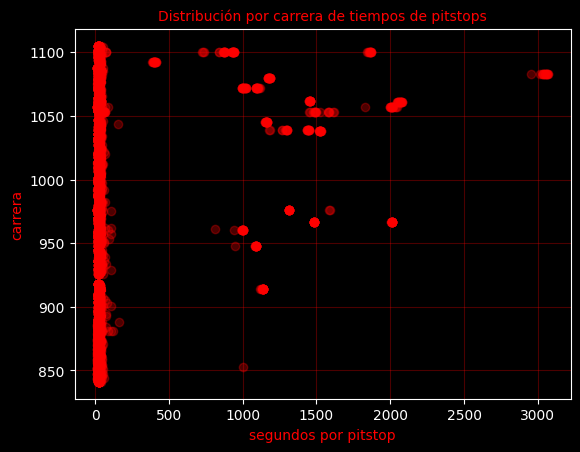

In [24]:
plt.grid(c='red', alpha=0.3)

plt.xlabel('segundos por pitstop', c='red', fontsize=10)
plt.ylabel('carrera',fontsize=10,c='red')
plt.colorbar
plt.title('Distribución por carrera de tiempos de pitstops', c='red', fontsize=10)
plt.scatter(pit_stops['milliseconds']/1000, pit_stops["raceId"], c='red', alpha=0.3)

In [25]:
# PERCENTILES

Q1 = np.percentile(pit_stops['milliseconds'], 25,
                   method = 'midpoint')

Q2=np.percentile(pit_stops['milliseconds'], 50, method='midpoint')

Q3 = np.percentile(pit_stops['milliseconds'], 75,
                   method = 'midpoint')

print(f"Q1: {Q1}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")
print(f"Q3-Q1: {Q3-Q1}\n")

print('Usando función Rango ss.iqr\nIQR: {}'.format(ss.iqr(pit_stops['milliseconds'])))

Q1: 21916.0
Q2: 23575.0
Q3: 26228.5
Q3-Q1: 4312.5

Usando función Rango ss.iqr
IQR: 4312.25


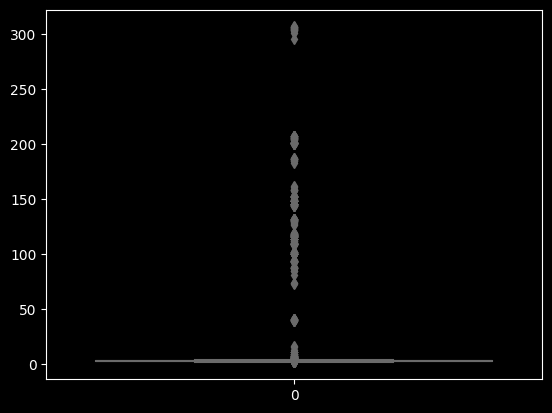

In [39]:
sns.boxplot(pit_stops['milliseconds']);

In [31]:
p=pit_stops['milliseconds'][pit_stops.milliseconds<15000]/1000

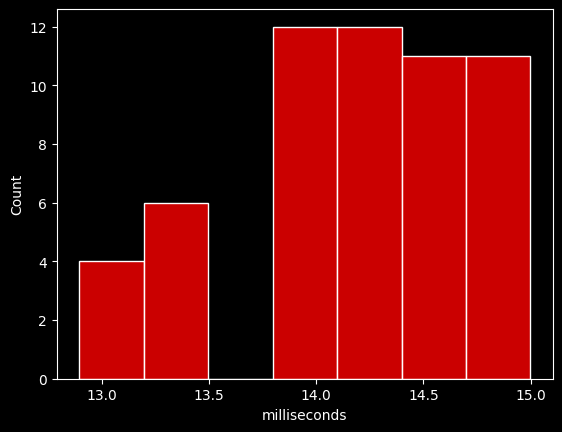

In [42]:
sns.histplot(p, color='red', alpha=0.8);

In [45]:
a=[1,2,3]
y=list(map(lambda x: np.sin(x), a))

<BarContainer object of 3 artists>

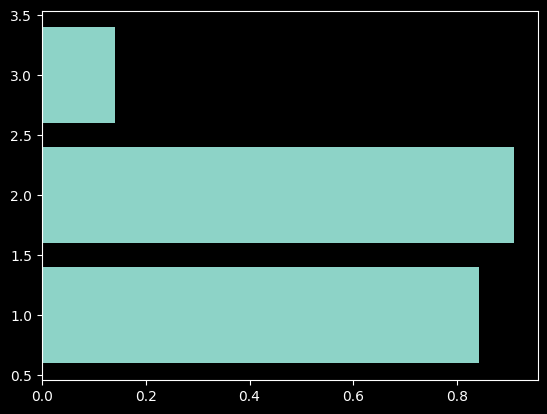

In [46]:
plt.rc_context({'axes.edgecolor':'red', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'red'})
plt.barh(x,y)